# Importation des données

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

try:
    df = pd.read_csv("car_insurance.csv", low_memory=False)
except BaseException:
    print("try with encoding error = ignore")
    df = pd.read_csv("car_insurance.csv", low_memory=False, encoding_errors="ignore")

print(df.columns)
print("nombre de lignes : " + str(len(df.index)))

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')
nombre de lignes : 10000


# Examen des données
Les données “driving_experience”, “education”, “income”, “vehicle_year”, “vehicle_type” sont des données qualitatives et devront être transformées afin d’être traitées

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'credit_score'}>],
       [<AxesSubplot:title={'center':'vehicle_ownership'}>,
        <AxesSubplot:title={'center':'married'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'postal_code'}>],
       [<AxesSubplot:title={'center':'annual_mileage'}>,
        <AxesSubplot:title={'center':'speeding_violations'}>,
        <AxesSubplot:title={'center':'duis'}>,
        <AxesSubplot:title={'center':'past_accidents'}>],
       [<AxesSubplot:title={'center':'outcome'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

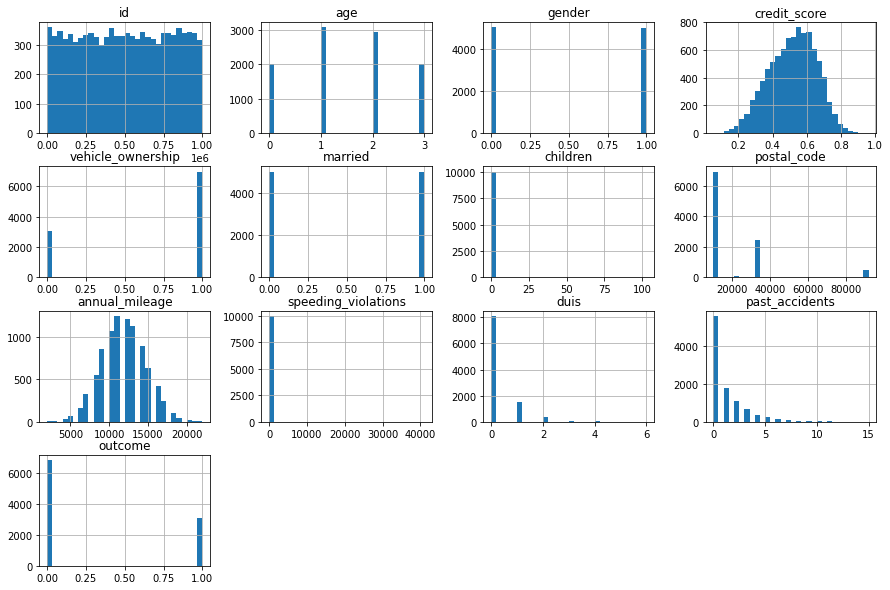

In [42]:
print(df.isna().sum())
df.hist(bins=30, figsize=(15, 10))

# Préparation des données
Pour les données manquantes des colonnes “credit_score” et “annual_mileage” on remplace les valeurs manquantes par la médiane de leur colonne car elles ne représentent pas plus d'un tiers de l'échantillon auquel cas nous les aurions supprimées.

In [43]:
#Traitement des données manquantes
#Attention à run all code à chaque fois sinon ce qu'on souhaite montrer "disparaît"
#Lorsque run cellule par cellule Jupyter garde en mémoire la valeur du dernier run par cellule et non pas celui du dernier run all
print(df.isna().sum())
for col in df:
    if col == 'credit_score' or col == 'annual_mileage':
        df[col] = df[col].fillna(df[col].median())
print(df.isna().sum())

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64
id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64


Même chose pour les données aberrantes: remplacement par la valeur de la médiane

array([[<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'speeding_violations'}>]],
      dtype=object)

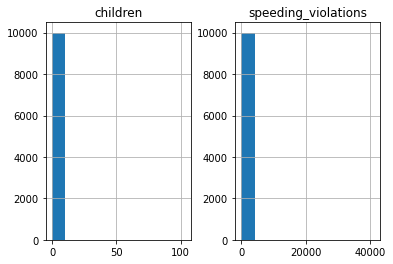

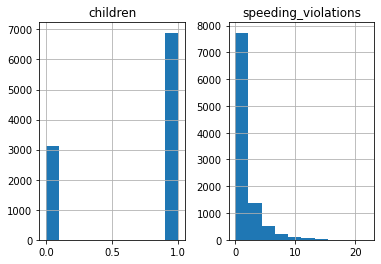

In [44]:
#Traitement des données aberrantes
df.hist(column=['children','speeding_violations'])
df.loc[df.children > 20, 'children'] = df['children'].median()
df.loc[df.speeding_violations > 30, 'speeding_violations'] = df['speeding_violations'].median()
df.hist(column=['children','speeding_violations'])

Suppression des colonnes qui ne sont pas intéressantes pour la résolution du problème de classification.
Nous supprimerons la colonne "id" qui n'est pas pertinente pour notre classification

In [45]:
df = df.drop(columns=['id'])

Pour la transformation des variables qualitatives en variables numériques:
- driving_experience: 0: entre 0 et 9 ans d'expérience, 1: entre 10 et 19 ans d'expérience, 2: entre 20 et 29 ans d'expérience, 3: plus de 30 ans d'expérience
- education: 0: aucune, 1: lycée, 2: université
- income: 0: pauvreté, 1: classe ouvrière, 2: classe moyenne, 3: classe supérieure
- vehicle_year: 0: avant 2015, 1: après 2015
- vehicle_type: 0: sedan, 1: voiture de sport

In [46]:
print("Avant transformation:")
print(df.driving_experience.unique())
print(df.education.unique())
print(df.income.unique())
print(df.vehicle_year.unique())
print(df.vehicle_type.unique())

label_encoder = LabelEncoder()

print("\nAprès transformation:")
#driving_experience
label_encoder.fit(df['driving_experience'])
df['driving_experience'] = label_encoder.transform(df['driving_experience'])
print(df.driving_experience.unique())

#education
label_encoder.fit(df['education'])
df['education'] = label_encoder.transform(df['education'])
print(df.education.unique())

#income
label_encoder.fit(df['income'])
df['income'] = label_encoder.transform(df['income'])
print(df.income.unique())

#vehicle_year
label_encoder.fit(df['vehicle_year'])
df['vehicle_year'] = label_encoder.transform(df['vehicle_year'])
print(df.vehicle_year.unique())

#vehicle_type
label_encoder.fit(df['vehicle_type'])
df['vehicle_type'] = label_encoder.transform(df['vehicle_type'])
print(df.vehicle_type.unique())

Avant transformation:
['0-9y' '10-19y' '20-29y' '30y+']
['high school' 'none' 'university']
['upper class' 'poverty' 'working class' 'middle class']
['after 2015' 'before 2015']
['sedan' 'sports car']

Après transformation:
[0 1 2 3]
[0 1 2]
[2 1 3 0]
[0 1]
[0 1]


Il nous reste à normaliser les données d'entrée. Nous utiliserons pour cela la classe StandardScaler:

In [47]:
# Exclusion de la variable de sortie
df_sans_outcome = [col for col in df.columns if col != 'outcome']
# Instantiation d'un StandardScaler
tab_numpy = df[df_sans_outcome].values
scaler = StandardScaler()
# Input des données au scaler
scaler.fit(tab_numpy)
# Normalisation
donnees_normalisees = scaler.transform(tab_numpy)
# Re-transformation en dataframe et rajout de la colonne de la variable de sortie
df_normalise = pd.DataFrame(donnees_normalisees, columns=df_sans_outcome)
df = df_normalise.assign(outcome=df['outcome'])
print(df.describe())

                age        gender  driving_experience     education  \
count  1.000000e+04  1.000000e+04        1.000000e+04  1.000000e+04   
mean  -4.742873e-17 -6.394885e-18        6.394885e-17  1.136868e-17   
std    1.000050e+00  1.000050e+00        1.000050e+00  1.000050e+00   
min   -1.452849e+00 -9.980020e-01       -1.079662e+00 -1.087026e+00   
25%   -4.774554e-01 -9.980020e-01       -1.079662e+00 -1.087026e+00   
50%   -4.774554e-01 -9.980020e-01       -6.997154e-02  2.547630e-02   
75%    4.979387e-01  1.002002e+00        9.397188e-01  1.137979e+00   
max    1.473333e+00  1.002002e+00        1.949409e+00  1.137979e+00   

             income  credit_score  vehicle_ownership  vehicle_year  \
count  1.000000e+04  1.000000e+04       1.000000e+04  1.000000e+04   
mean  -1.669775e-17 -2.891909e-16       1.261213e-16 -1.350031e-17   
std    1.000050e+00  1.000050e+00       1.000050e+00  1.000050e+00   
min   -1.549750e+00 -3.543204e+00      -1.516684e+00 -1.515607e+00   
25%   -5.5

Les moyennes proches de 0 et les variances proches de 1 attestent de la normalisation de nos données d'entrée.

# Recherche de corrélations
Intéressons-nous maintenant aux corrélations existantes dans notre jeu de données


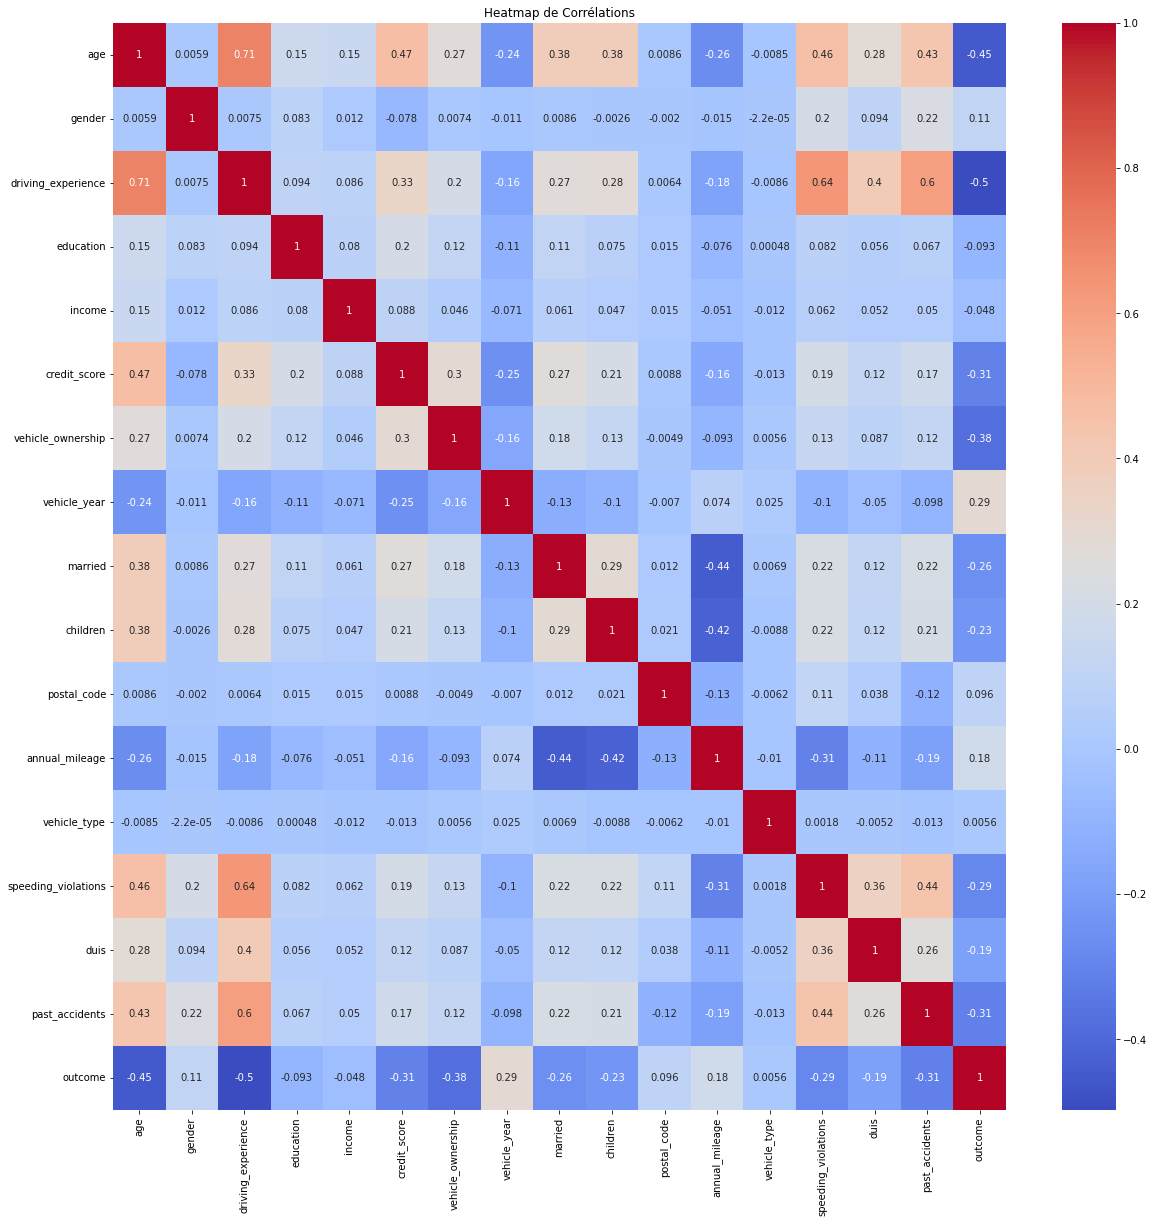

In [48]:
correlations = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))
# Créer la heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm')

# Ajouter le titre
plt.title('Heatmap de Corrélations')


# Afficher la heatmap
plt.show()

Le coefficient de corrélation indique comment deux variables évoluent linéairement l'une par rapport à l'autre. Plus la valeur absolue du coefficient de corrélation est proche de 1, plus la relation linéaire entre les variables est forte. Tandis qu'un coefficient de corrélation proche de zéro indique une faible corrélation linéaire. Le coefficient est négatif si lorsqu'une variable augmente l'autre diminue et il est positif dans le cas inverse.